In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

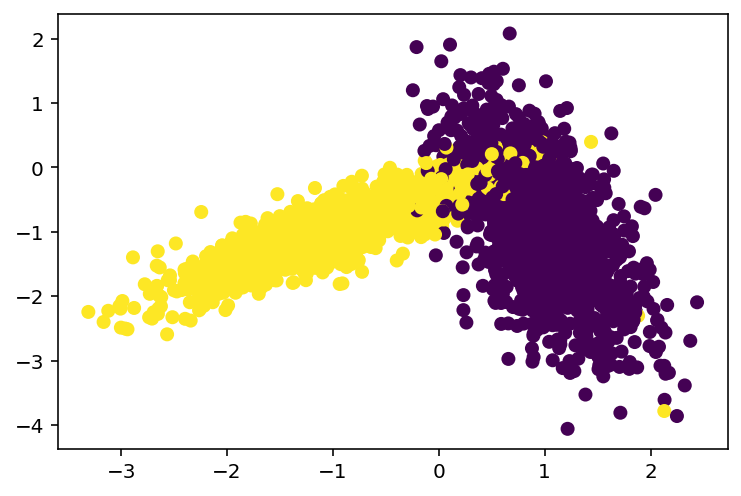

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [7]:
def index_count(b,c):
    b1=[]
    c1=[]
    d=round(b.shape[0]/c)
    x=0;d1=d
    for i in range(c-1):
        c1.append(x)
        c1.append(d1)
        b1.append(c1)
        c1=[]
        x=d1
        d1=d+d1
    c1.append(x)
    c1.append(d1)
    b1.append(c1)
    return b1

In [8]:
def split_data(x_train,i,b):
    x1=x_train.tolist()
    return numpy.array(x1[b[i][0]:b[i][1]])

In [9]:
from random import uniform 
def RandomSearchCV(x_train,y_train,classifier, parm, folds):
    trainscores = []
    testscores  = []
    for k in tqdm(parm):
        trainscores_folds = []
        testscores_folds  = []
        b=index_count(x_train,folds)
        for i in range(0,folds):
            X_test=split_data(x_train,i,b)
            Y_test=split_data(y_train,i,b)

            X1=x_train.tolist()
            X1_train=X1.copy()
            del X1_train[b[i][0]:b[i][1]]
            X_train=numpy.array(X1_train)
            Y1=y_train.tolist()
            Y1_train=Y1.copy()
            del Y1_train[b[i][0]:b[i][1]]
            Y_train=numpy.array(Y1_train)

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores


In [14]:
from random import uniform 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

parm_range=(1,50)
parm=[]
for i in range(parm_range[0],parm_range[1]):
    parm.append(int(random.uniform(parm_range[0],parm_range[1])))
parm=parm[:10]
classifier = KNeighborsClassifier()
folds = 3
trainscores,testscores = RandomSearchCV(X_train, y_train, classifier, parm, folds)
#print(trainscores,testscores)

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:08,  1.10it/s]

 20%|██        | 2/10 [00:01<00:07,  1.11it/s]

 30%|███       | 3/10 [00:02<00:06,  1.11it/s]

 40%|████      | 4/10 [00:03<00:05,  1.03it/s]

 50%|█████     | 5/10 [00:04<00:04,  1.02it/s]

 60%|██████    | 6/10 [00:05<00:03,  1.00it/s]

 70%|███████   | 7/10 [00:06<00:02,  1.01it/s]

 80%|████████  | 8/10 [00:07<00:01,  1.01it/s]

 90%|█████████ | 9/10 [00:08<00:01,  1.02s/it]

100%|██████████| 10/10 [00:10<00:00,  1.11s/it]

100%|██████████| 10/10 [00:10<00:00,  1.03s/it]

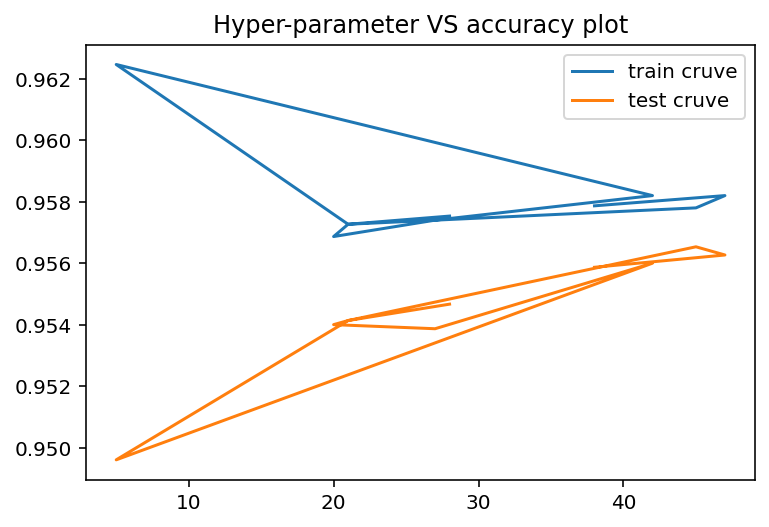

In [15]:

plt.plot(parm,trainscores, label='train cruve')
plt.plot(parm,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [16]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

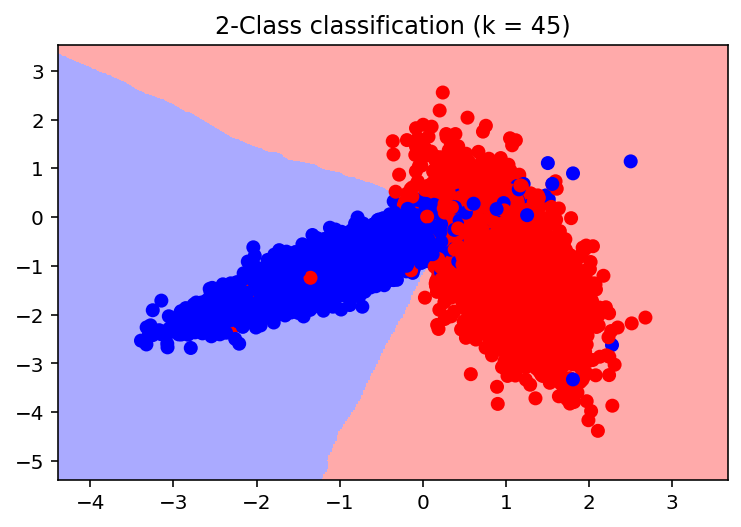

In [17]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)